# Problem :

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

#import the required library

# Student will have to code here
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.layers import LSTM, Flatten, Dropout, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_cv.shape)

# truncate and pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_cv = sequence.pad_sequences(X_cv,maxlen=max_review_length)

Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of CV data: (5000,)


In [3]:
y_train[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [4]:
# Decoding the data coded data of IMDB ( Data Understanding )
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded) 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # notice i have given this 1 star if the option been given i would have given this zero as i put this dvd into my tv and sat down on my couch i was expecting some of the worst film making at its finest i looked this mo

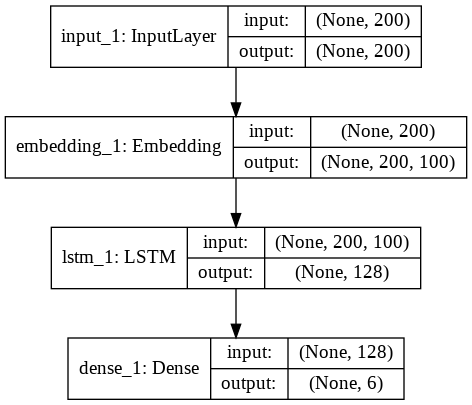

In [5]:
# Architecture Diagram for LSTM Based Classifcation but you will have to change the
# configuration/model parameters while implementing it depending on the input , output and the 
# Problem statement.

from IPython.display import Image
Image(filename='LSTM_model.png')


In [6]:
import tensorflow as tf

# Write the code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer

# Students will be starting their code from here:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history = model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 402s 1s/step - loss: 0.6111 - accuracy: 0.6496 - val_loss: 0.3238 - val_accuracy: 0.8664
Epoch 2/5
313/313 [==============================] - 281s 896ms/step - loss: 0.2821 - accuracy: 0.8886 - val_loss: 0.3057 - val_accuracy: 0.8686
Epoch 3/5
313/313 [==============================] - 276s 881ms/step - loss: 0.2089 - ac

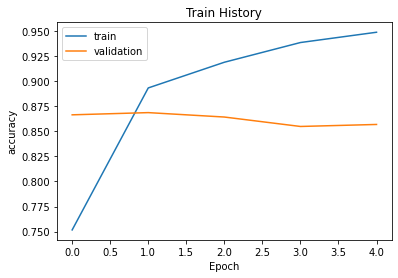

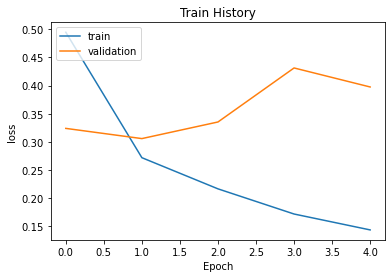

In [7]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(history,'accuracy','val_accuracy')
show_train_history(history,'loss','val_loss')

In [8]:
print('Training loss \t', history.history['loss'][-1]*100)
print('Training accuracy ',  history.history['accuracy'][-1]*100)
print('Validation loss ', history.history['val_loss'][-1]*100)
print('Validation accuracy ',  history.history['val_accuracy'][-1]*100)

Training loss 	 14.32565450668335
Training accuracy  94.87000107765198
Validation loss  39.74485695362091
Validation accuracy  85.68000197410583


In [9]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', scores[0]*100)
print('Testing accuracy ', scores[1]*100)

782/782 [==============================] - 70s 89ms/step - loss: 0.3974 - accuracy: 0.8572
Testing loss 	 39.741843938827515
Testing accuracy  85.7159972190857


In [10]:
predict=model.predict_classes(X_test)
predict_classes=predict.reshape(len(X_test))

In [11]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [12]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])
display_test_sentiment(3)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

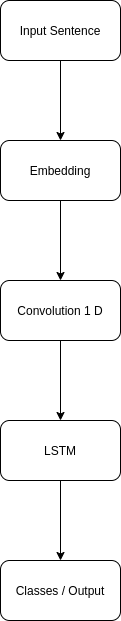

In [13]:
# High Level Model Architecture
from IPython.display import Image
Image(filename='1_VGtBedNuZyX9E-07gnm2Yg.png')


In [16]:
# create the model
embedding_vector_length = 32
cnn_model = Sequential()

# Students will be starting their code from here:

# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer

cnn_model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(100))
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Students will be ending their code here

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history_c=cnn_model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 600, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 300, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 125s 393ms/step - loss: 0.5673 - accuracy: 0.6678 - val_

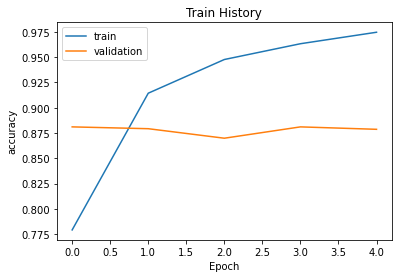

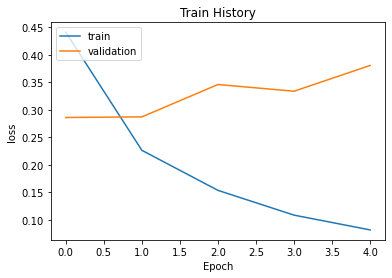

In [17]:
# Final evaluation of the CNN + RNN model using the test data
# Students will be starting their code from here:
show_train_history(history_c,'accuracy','val_accuracy')
show_train_history(history_c,'loss','val_loss')

In [18]:
print('Training loss \t', history_c.history['loss'][-1]*100)
print('Training accuracy ',  history_c.history['accuracy'][-1]*100)
print('Validation loss ', history_c.history['val_loss'][-1]*100)
print('Validation accuracy ',  history_c.history['val_accuracy'][-1]*100)

Training loss 	 8.179525285959244
Training accuracy  97.45500087738037
Validation loss  38.09112906455994
Validation accuracy  87.8600001335144


In [19]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:

cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', scores[0]*100)
print('Testing accuracy ', scores[1]*100)

782/782 [==============================] - 40s 51ms/step - loss: 0.4218 - accuracy: 0.8672
Testing loss 	 39.741843938827515
Testing accuracy  85.7159972190857


### Comparing the models

In [20]:
#Creating a function to display values:
def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

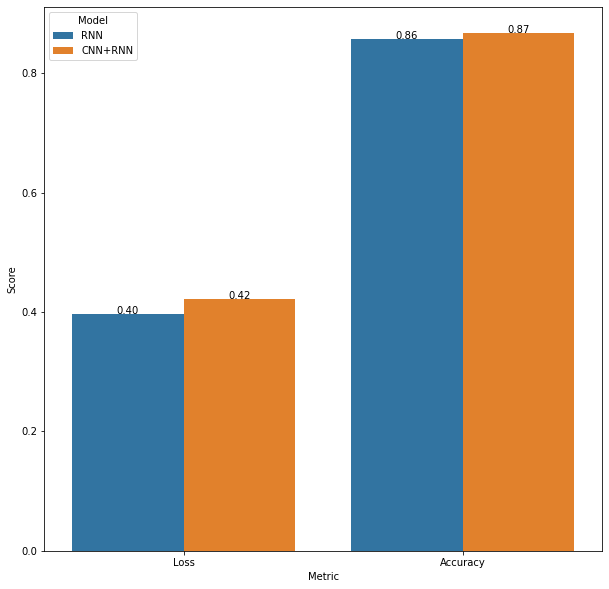

In [22]:
#Creating a dataframe to draw out comparisons

import seaborn as sns
import pandas as pd

results=[]
results.append([scores[0], 'Loss', 'RNN'])
results.append([scores[1], 'Accuracy', 'RNN'])
results.append([cnn_scores[0], 'Loss', 'CNN+RNN'])
results.append([cnn_scores[1], 'Accuracy', 'CNN+RNN'])


comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])

plt.figure(figsize=(10,10))
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'])

show_values_on_bars(plot)

We see that, there is no noticible change in performance when we have added a convolutional layer to the RNN model.